# Exercício Prático - Data Visualization

## Desafio Prático 1: Visualizando Dados Diferentes

**Descrição:**  
Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos dados, correlações entre variáveis e tendências.

**Tarefas:**
1. Carregar os dados de um arquivo CSV fornecido (`saude.csv`).  
2. Criar um histograma da variável `age` usando Matplotlib.  
3. Criar um gráfico de dispersão mostrando a relação entre `height` e `weight` usando Seaborn.  
4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por `gender` usando Plotly.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('saude.csv')

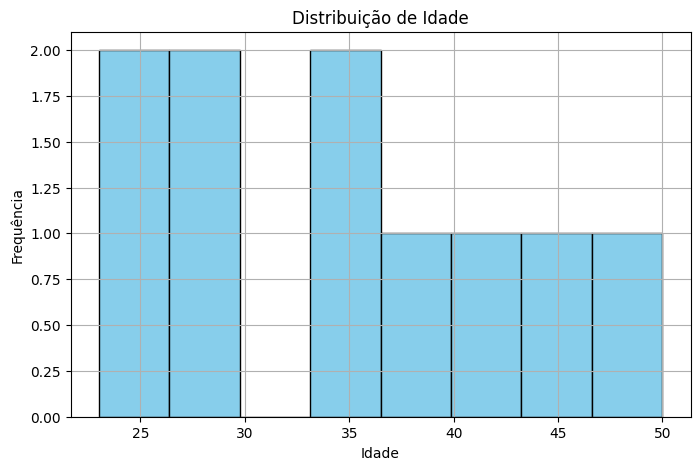

In [3]:
# 1. Histograma da variável 'age' usando Matplotlib
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=8, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

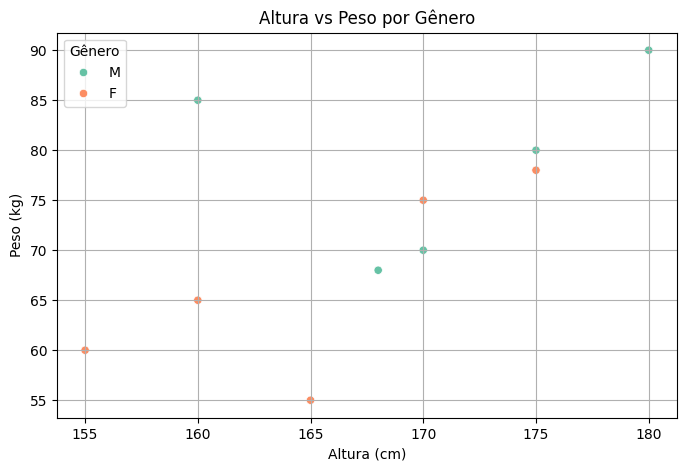

In [4]:
# 2. Gráfico de dispersão entre 'height' e 'weight' usando Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='height', y='weight', hue='gender', palette='Set2')
plt.title('Altura vs Peso por Gênero')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend(title='Gênero')
plt.grid(True)
plt.show()

In [6]:
# 3. Gráfico de barras interativo com Plotly: contagem por gênero
genero_contagem = df['gender'].value_counts().reset_index()
genero_contagem.columns = ['gender', 'count']
fig = px.bar(genero_contagem,
             x='gender', y='count',
             labels={'gender': 'Gênero', 'count': 'Contagem'},
             title='Contagem de Indivíduos por Gênero',
             color='gender',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

## Desafio Prático 2: Séries Temporais  

**Descrição:**  
Neste desafio, suas alunas irão analisar uma série temporal de dados de vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar tendências e sazonalidades.  

**Tarefas:**  
1. Carregar os dados de um arquivo CSV fornecido (`vendas.csv`).  
2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.  
3. Criar um gráfico de decomposição sazonal usando Seaborn.  
4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('vendas.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

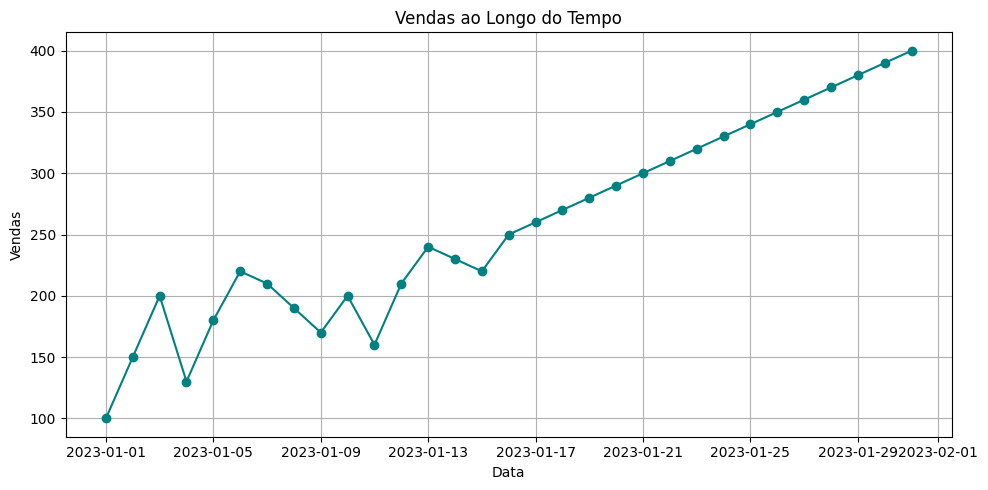

In [8]:
# 2. Gráfico de linhas das vendas ao longo do tempo com Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['sales'], marker='o', color='teal')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.tight_layout()
plt.show()

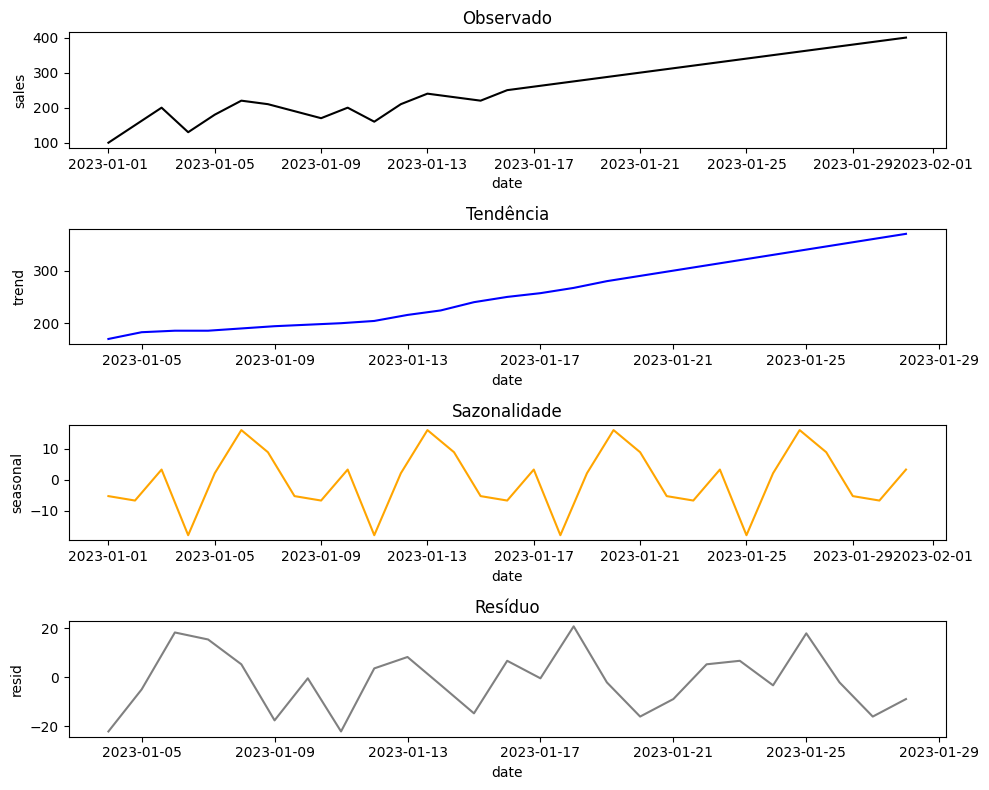

In [9]:
# 3. Gráfico de decomposição sazonal (usando statsmodels + Seaborn)
# Para isso, os dados precisam de uma frequência definida
df = df.asfreq('D')  # Define frequência diária
decomposicao = seasonal_decompose(df['sales'], model='additive', period=7)  # 7 dias para detectar sazonalidade semanal

# Plotando os componentes com Seaborn + Matplotlib
plt.figure(figsize=(10, 8))
plt.subplot(411)
sns.lineplot(x=decomposicao.observed.index, y=decomposicao.observed, color='black')
plt.title('Observado')
plt.subplot(412)
sns.lineplot(x=decomposicao.trend.index, y=decomposicao.trend, color='blue')
plt.title('Tendência')
plt.subplot(413)
sns.lineplot(x=decomposicao.seasonal.index, y=decomposicao.seasonal, color='orange')
plt.title('Sazonalidade')
plt.subplot(414)
sns.lineplot(x=decomposicao.resid.index, y=decomposicao.resid, color='gray')
plt.title('Resíduo')
plt.tight_layout()
plt.show()

In [10]:
# 4. Gráfico interativo com Plotly
fig = px.line(df.reset_index(),
              x='date', y='sales',
              title='Vendas ao Longo do Tempo (Interativo)',
              labels={'date': 'Data', 'sales': 'Vendas'},
              markers=True)
fig.update_traces(line_color='mediumvioletred')
fig.show()